In [14]:
import numpy as np
np.set_printoptions(precision=3)
import pandas as pd
pd.set_option('display.precision', 3)
import matplotlib.pyplot as plt


from scipy.stats import norm
import math


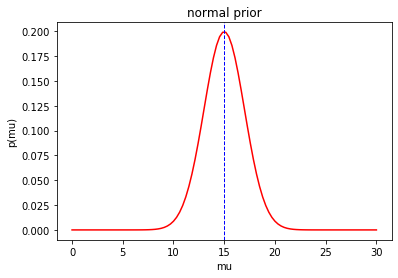

In [15]:
#choose belief parameter
mu0=15; std0=2

prior=norm(mu0,std0)
mu=np.linspace(0,30,100)

plt.plot(mu,prior.pdf(mu), color='r')
plt.title('normal prior')
plt.xlabel('mu')
plt.ylabel('p(mu)')
plt.axvline(x=mu0, color="b", linestyle="--", linewidth=1)


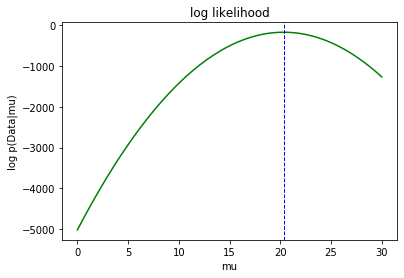

In [16]:
#scipy stats package does not allow for plotting pdf-theta 
#so we need to define for mula directly
np.random.seed(101)
data=norm.rvs(loc=20, scale=2, size=100)

def log_likelihood(D,mu): #define function 'likelihood'
    n =np.size(D); sigma = np.std(D)
    xbar=np.mean(D)
    mu=np.linspace(0,30,100)
    pi=math.pi
    return (-0.5 * n * np.log(2 * pi * sigma)
            - 0.5 * (n*np.mean(D**2)-2*n*mu*np.mean(D)+n*mu**2) / sigma ** 2) 
    

plt.plot(mu, log_likelihood(data, mu), color="g")
plt.title("log likelihood")
plt.xlabel("mu")
plt.ylabel("log p(Data|mu)")
plt.axvline(x= np.mean(data), color="b", linestyle="--", linewidth=1)


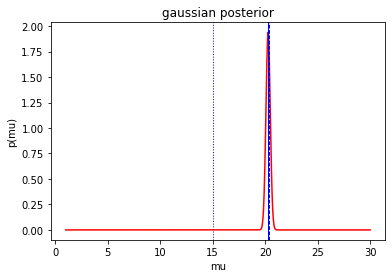

In [17]:
# Belief update
sigma=np.std(data)
sigma0=std0
n=np.size(data)
xbar=np.mean(data)

mu1= (xbar*sigma0**2+mu0*sigma**2/n)/ (sigma0**2+sigma**2/n)
sigma1 = np.sqrt( (sigma**2*sigma0**2/n) /(sigma0**2+sigma**2/n) )

posterior=norm(mu1,sigma1)
mu=np.linspace(1,30,1000)

plt.plot(mu,posterior.pdf(mu), color='r')
plt.title('gaussian posterior')
plt.xlabel('mu')
plt.ylabel('p(mu)')

plt.axvline(x=15, color="b", linestyle=":", linewidth=1)
plt.axvline(x=np.mean(data), color="b", linestyle="--", linewidth=1)
plt.axvline(x=mu1, color="b", linestyle="-", linewidth=1)

ValueError: x and y must have same first dimension, but have shapes (1000,) and (100,)

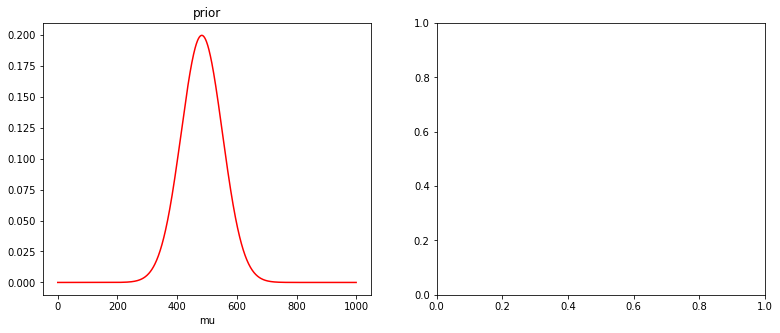

In [18]:
# in a nutshell;
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(131)
ax1.plot(prior.pdf(mu), color='r')
ax1.set_title('prior')
ax1.set_xlabel('mu')


ax2 = fig.add_subplot(132)
ax2.plot(mu, log_likelihood(data, mu), color='g')
ax2.set_title('log likelihood')
ax2.set_xlabel('mu')

ax3 = fig.add_subplot(133)
ax3.plot(posterior.pdf(mu), color='r')
ax3.set_title('posterior')
ax3.set_xlabel('mu')
